# Análisis exploratorio y demás

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.tsa
from arch.unitroot import PhillipsPerron

from scipy.stats import pearsonr

In [2]:
data=pd.read_csv("/home/pablo/Descargas/TFG/SerieCompletaNatalidad.csv", parse_dates=["Periodo"], index_col="Periodo")

/tmp/ipykernel_6125/2677156176.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.read_csv("/home/pablo/Descargas/TFG/SerieCompletaNatalidad.csv", parse_dates=["Periodo"], index_col="Periodo")


In [3]:
df=pd.read_csv("/home/pablo/Descargas/TFG/TablaVariablesCompleta.csv", parse_dates=["Periodo"], index_col="Periodo")

In [27]:
df

,Tasa Natalidad bruta,Población residente total,Población extranjera total,Esperanza de vida,Edad media de maternidad,Edad media de nupcialidad,Tasa bruta de nupcialidad,Número total de divorcios,Número total de separaciones,Tasa de empleo,Tasa de paro,Salario medio bruto en mujeres,Salario medio bruto en hombres,Salario mediano en mujeres,Salario mediano en hombres,Índice de precios de vivienda,Media anual del precio de vivienda,IPC
Periodo,,,,,,,,,,,,,,,,,,
2009-12-31,10.65,46486621.0,5648671.0,81.66,31.04,33.60,3.78,98359,106166,48.80,18.66,19502.020000,25001.050000,16433.140000,20730.710000,136.313,137.483,87.031
2010-12-31,10.42,46667175.0,5747734.0,82.07,31.20,34.10,3.62,102933,110321,48.13,20.11,19735.220000,25479.740000,16536.100000,21206.990000,133.718,134.745,89.631
2011-12-31,10.07,46818216.0,5751487.0,82.25,31.44,34.54,3.46,103604,110651,46.69,22.56,19767.590000,25667.890000,16796.410000,21487.990000,118.782,124.829,91.762
2012-12-31,9.70,46712650.0,5736258.0,82.26,31.56,34.77,3.56,104262,110764,44.71,25.77,19537.330000,25682.050000,16524.510000,21425.140000,103.593,107.678,94.394
2013-12-31,9.11,46495744.0,5546238.0,82.77,31.67,35.34,3.32,95427,100437,44.46,25.73,19514.580000,25675.170000,16452.430000,21371.130000,95.512,96.266,94.632
2014-12-31,9.18,46425722.0,5023487.0,82.91,31.78,35.41,3.45,100746,105893,45.61,23.70,19744.820000,25727.240000,16771.320000,21528.500000,97.194,96.553,93.646
2015-12-31,9.02,46418884.0,4729644.0,82.67,31.90,35.80,3.59,96562,101357,47.01,20.90,20051.580000,25992.760000,16825.110000,21740.880000,101.305,100.000,93.663
2016-12-31,8.80,46497393.0,4618581.0,83.08,32.00,36.10,3.73,96824,101294,47.97,18.63,20131.410000,25924.430000,16831.580000,21626.000000,105.848,104.664,95.132
2017-12-31,8.41,46645070.0,4572807.0,83.05,32.08,36.40,3.68,9796,102341,49.07,16.55,20607.850000,26391.840000,17214.600000,21970.340000,113.457,111.137,96.190


## Correlación de pearson

In [28]:
corr_matrix = df.corr(method="pearson")
pval_matrix = df.corr(method=lambda x, y: pearsonr(x, y)[1])

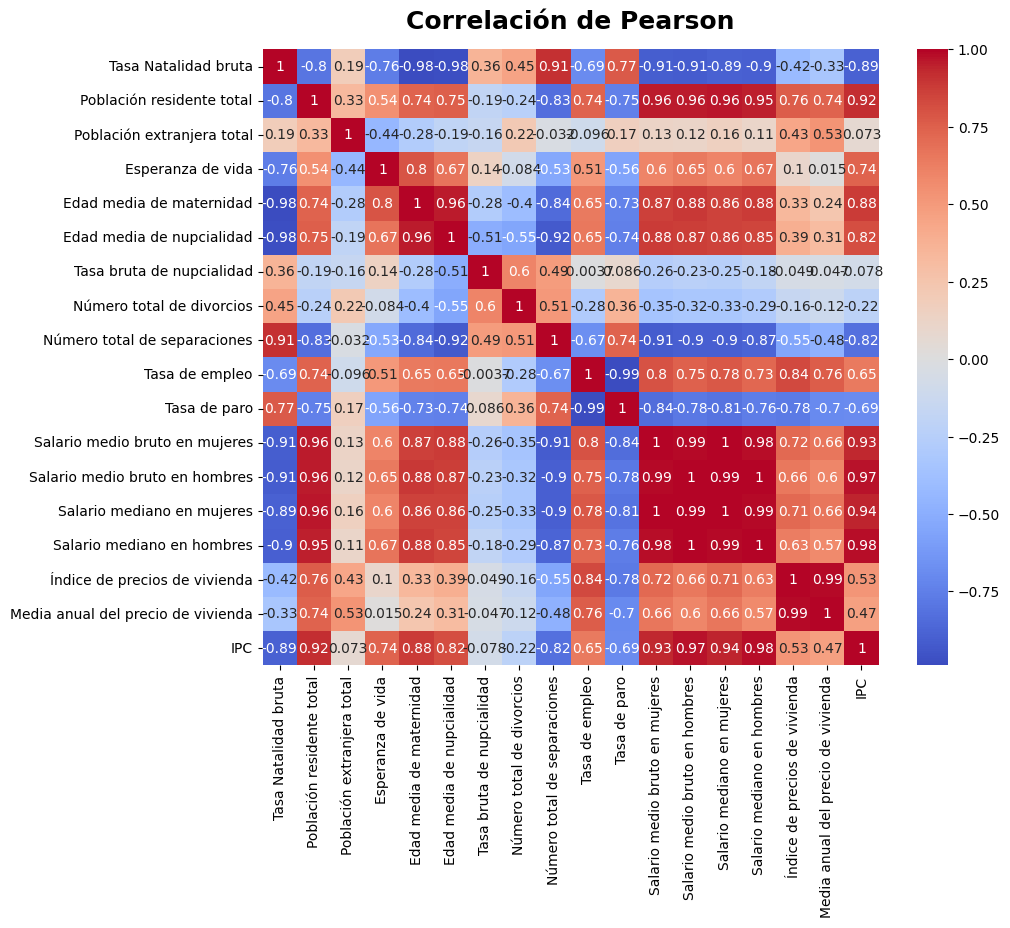

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)

plt.title("Correlación de Pearson", fontsize=18, weight='bold', pad=15)
plt.show()

## Variable objetivo

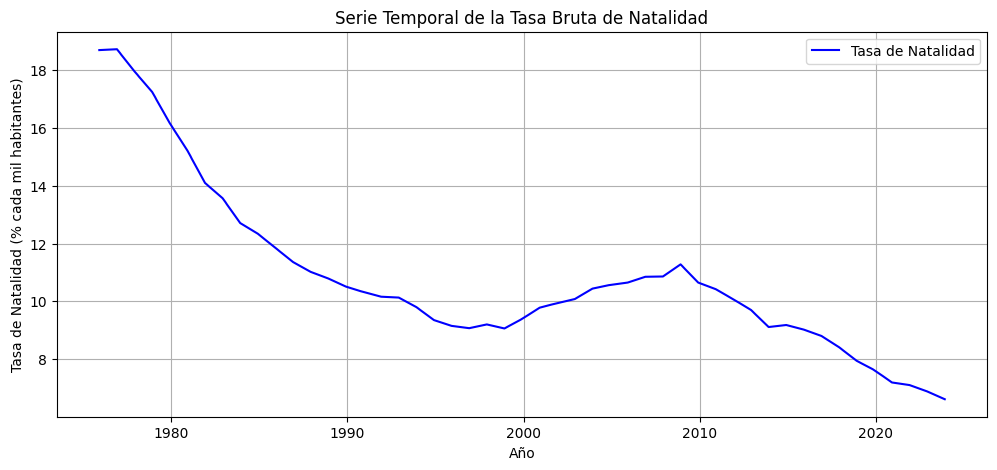

In [32]:
#Visualizo la serie
plt.figure(figsize=(12,5))
plt.plot(data["Tasa Natalidad bruta"], label="Tasa de Natalidad", color="blue")
plt.title("Serie Temporal de la Tasa Bruta de Natalidad")
plt.xlabel("Año")
plt.ylabel("Tasa de Natalidad (% cada mil habitantes)")
plt.legend()
plt.grid()
plt.show()

## Descomposición de la serie

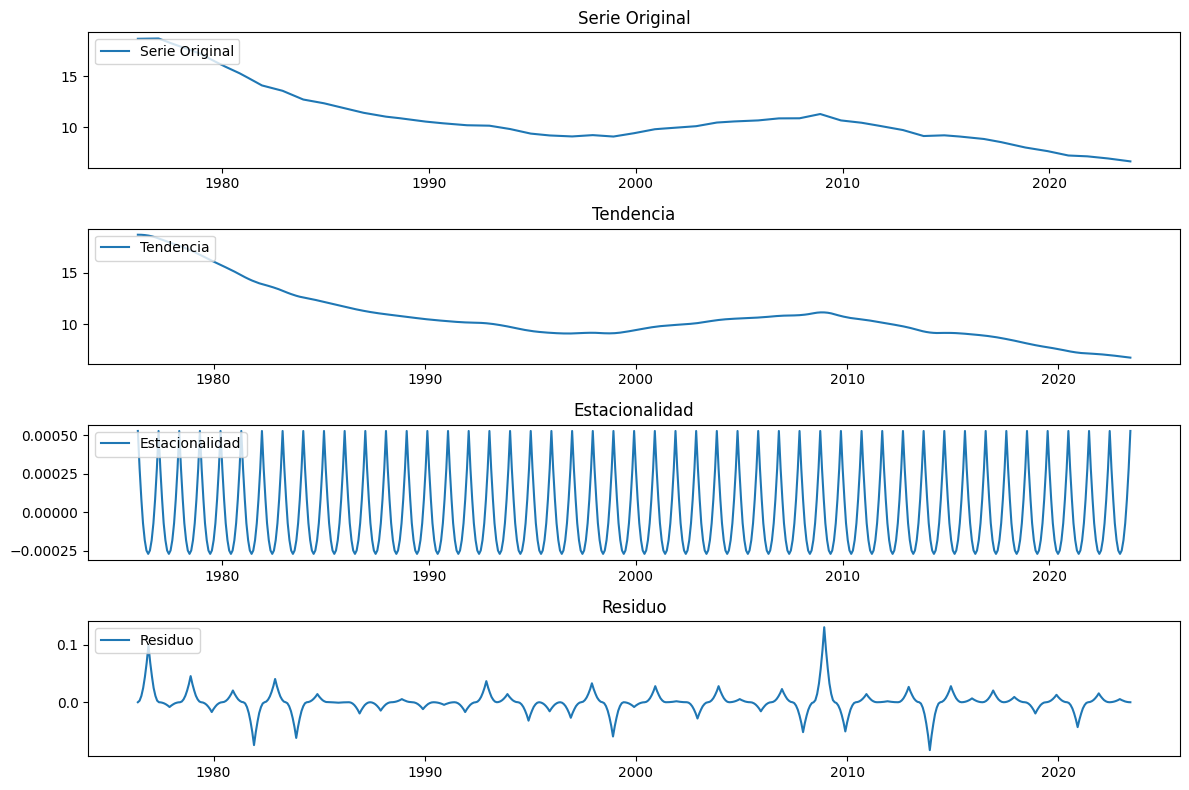

In [ ]:
modelo = 'aditivo'

decomposition = seasonal_decompose(data, model=modelo)

tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data, label='Serie Original')
plt.legend(loc='upper left')
plt.title('Serie Original')

plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='upper left')
plt.title('Tendencia')

plt.subplot(413)
plt.plot(estacionalidad, label='Estacionalidad')
plt.legend(loc='upper left')
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(residuo, label='Residuo')
plt.legend(loc='upper left')
plt.title('Residuo')

plt.tight_layout()
plt.show()

## Estacionariedad (Dickey-Fuller, y Phillips-Perron)

In [ ]:
serie = data["Tasa Natalidad bruta"]

resultado_adf = adfuller(serie, autolag='AIC')

print('Prueba ADF:')
print('Estadístico de prueba: %f' % resultado_adf[0])
print('Valor p: %f' % resultado_adf[1])
print('Valores críticos:')
for key, value in resultado_adf[4].items():
    print('\t%s: %.3f' % (key, value))

if resultado_adf[1] <= 0.05:
    print("Rechazamos la hipótesis nula. La serie es estacionaria.")
else:
    print("No rechazamos la hipótesis nula. La serie podría no ser estacionaria.")


Prueba ADF:
Estadístico de prueba: -0.851576
Valor p: 0.803501
Valores críticos:
	1%: -3.442
	5%: -2.867
	10%: -2.570
No rechazamos la hipótesis nula. La serie podría no ser estacionaria.


'resultado_pp = test_breaks.PhillipsPerron(serie).fit()\n\nprint(\'\nPrueba Phillips-Perron:\')\nprint(\'Estadístico de prueba: %f\' % resultado_pp.stat)\nprint(\'Valor p: %f\' % resultado_pp.pvalue)\n\nif resultado_pp.pvalue <= 0.05:\n    print("Rechazamos la hipótesis nula. La serie es estacionaria.")\nelse:\n    print("No rechazamos la hipótesis nula. La serie podría no ser estacionaria.")'

In [ ]:
pp_test=PhillipsPerron(serie)
print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                  2.833
P-value                         1.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# Adicional

## Deteccion de valores atipicos

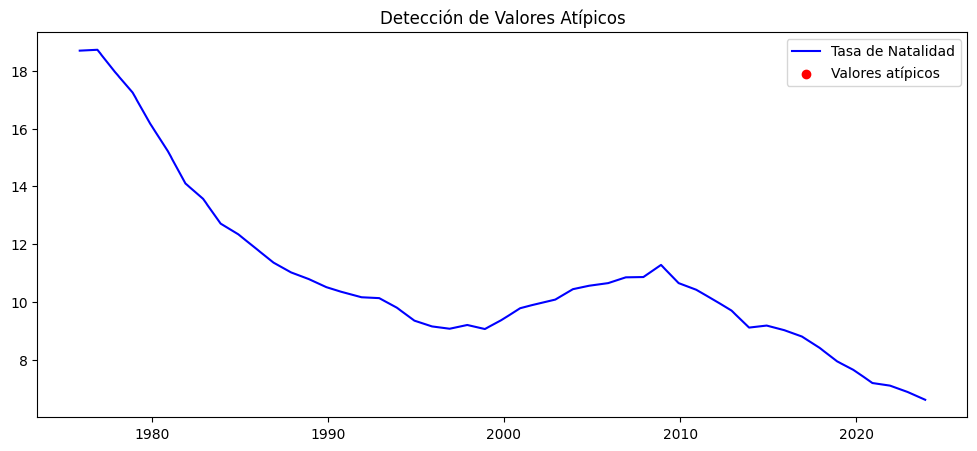

In [ ]:
limite_superior=data["Tasa Natalidad bruta"].mean()+3*data["Tasa Natalidad bruta"].std()
limite_inferior=data["Tasa Natalidad bruta"].mean()-3*data["Tasa Natalidad bruta"].std()

data_outliers=data[(data["Tasa Natalidad bruta"]>limite_superior)|(data["Tasa Natalidad bruta"]<limite_inferior)]

plt.figure(figsize=(12,5))
plt.plot(data["Tasa Natalidad bruta"], label="Tasa de Natalidad", color="blue")
plt.scatter(data_outliers.index, data_outliers["Tasa Natalidad bruta"], color="red", label="Valores atípicos")
plt.title("Detección de Valores Atípicos")
plt.legend()
plt.show()

## Medidas de estacionalidad, dispersion y forma